In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

#Random Forest
from sklearn.ensemble import RandomForestClassifier

## Entrenamiento

In [2]:
train=pd.read_pickle("../data/train_completo.pkl")#,dtype=tipos_conv)

In [3]:
train.head()

,cantidad_paginas_vistas_trimestre,cant_paginas_vistas_en_mes_1,cant_paginas_vistas_en_mes_2,cant_paginas_vistas_en_mes_3,page_mas_vista_en_mes_1_0,page_mas_vista_en_mes_1_1,page_mas_vista_en_mes_1_2,page_mas_vista_en_mes_1_3,page_mas_vista_en_mes_1_4,page_mas_vista_en_mes_1_5,...,page_mas_vista_en_mes_3_7,convirtio_en_mes_1,convirtio_en_mes_2,convirtio_en_mes_3,convirtio_multiple_en_mes_1,convirtio_multiple_en_mes_2,convirtio_multiple_en_mes_3,cant_vistas_no_md_trimestre,cant_vistas_md_trimestre,convirtio
USER_ID,,,,,,,,,,,,,,,,,,,,,
6574,1841,710,375,756,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,190,0
2639,623,250,192,181,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2,51,0
3898,419,127,78,214,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,26,0
7996,346,117,118,111,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,80,0
6111,1281,311,191,779,0,0,0,0,0,0,...,1,0,0,0,0,0,0,155,3,0


In [4]:
pred = pd.read_pickle("../data/prediccion_completo.pkl")
pred.sort_index(inplace = True)

In [5]:
RANDOM_SEED = 12
TEST_SIZE_PERCENT = 0.2

In [6]:
y = train['convirtio']
X = train.drop(axis=1, labels=['convirtio'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

feature_list = list(X.columns)

In [7]:
modelo = RandomForestClassifier(n_estimators=1000, max_depth=6, random_state=RANDOM_SEED)

In [51]:
# Training
modelo.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [52]:
# Predict value
pred_test = modelo.predict_proba(X_test)

In [53]:
y_test_predictd = pred_test[:, 1]
roc_auc_score(y_test, y_test_predictd)

0.900261143013399

In [54]:
modelo.score(X_test, y_test)

0.6557236654296318

In [59]:
cross_val_score(modelo, X, Y, cv=5)

array([0.82222222, 0.74222222, 0.82222222, 0.8       , 0.73333333])

### Predecir competencia

In [13]:
prediccion = modelo.predict_proba(pred)

In [14]:
prediccion =  pd.DataFrame(prediccion)[1].to_frame()

In [15]:
submit = pd.read_csv("../data/sampleSubmission.csv", index_col = 0)

In [16]:
submit["pred"] = prediccion[1]

In [17]:
submit["SCORE"] = submit["pred"]

In [18]:
submit.drop("pred", axis = 1, inplace = True)

In [19]:
submit.to_csv('../data/submit_random_forest.csv')

In [20]:
#modelo.save_model("modelo1_xgb")

In [21]:
# Get numerical feature importances
importances = list(modelo.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 7)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: cant_paginas_vistas_en_mes_3 Importance: 0.1102279
Variable: cantidad_paginas_vistas_trimestre Importance: 0.1082128
Variable: cant_paginas_vistas_en_mes_2 Importance: 0.0920275
Variable: cant_vistas_no_md_trimestre Importance: 0.0780189
Variable: cant_paginas_vistas_en_mes_1 Importance: 0.077906
Variable: convirtio_en_mes_3   Importance: 0.0769202
Variable: convirtio_multiple_en_mes_3 Importance: 0.0751514
Variable: cant_vistas_md_trimestre Importance: 0.0603841
Variable: convirtio_en_mes_2   Importance: 0.049324
Variable: convirtio_multiple_en_mes_2 Importance: 0.048579
Variable: convirtio_multiple_en_mes_1 Importance: 0.0344391
Variable: convirtio_en_mes_1   Importance: 0.0307212
Variable: page_mas_vista_en_mes_2_3 Importance: 0.0171086
Variable: page_mas_vista_en_mes_3_4 Importance: 0.0160487
Variable: page_mas_vista_en_mes_1_3 Importance: 0.0137888
Variable: page_mas_vista_en_mes_2_5 Importance: 0.0110891
Variable: page_mas_vista_en_mes_1_5 Importance: 0.0107536
Variable

In [24]:
#modelo.plot_importance(modelo)

### Entrenando con todo

In [25]:
modelo.fit(X, y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [26]:
prediccion = modelo.predict_proba(pred)

In [27]:
prediccion =  pd.DataFrame(prediccion)[1].to_frame()

In [28]:
submit = pd.read_csv("../data/sampleSubmission.csv", index_col = 0)

In [29]:
submit["pred"] = prediccion[1]

In [30]:
submit["SCORE"] = submit["pred"]

In [31]:
submit.drop("pred", axis = 1, inplace = True)

In [33]:
submit.to_csv('../data/submit_random_forest_completo.csv')

In [73]:
#modelo.save_model("modelo_random_forest_completo")

In [34]:
# Get numerical feature importances
importances = list(modelo.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 7)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: cant_paginas_vistas_en_mes_3 Importance: 0.1079688
Variable: cantidad_paginas_vistas_trimestre Importance: 0.1060226
Variable: cant_paginas_vistas_en_mes_2 Importance: 0.0899168
Variable: convirtio_multiple_en_mes_3 Importance: 0.0739362
Variable: cant_paginas_vistas_en_mes_1 Importance: 0.0732951
Variable: convirtio_en_mes_3   Importance: 0.0701736
Variable: cant_vistas_no_md_trimestre Importance: 0.0695148
Variable: convirtio_multiple_en_mes_1 Importance: 0.0542205
Variable: cant_vistas_md_trimestre Importance: 0.0521217
Variable: convirtio_multiple_en_mes_2 Importance: 0.0496575
Variable: convirtio_en_mes_1   Importance: 0.0479368
Variable: convirtio_en_mes_2   Importance: 0.047746
Variable: page_mas_vista_en_mes_2_3 Importance: 0.0182946
Variable: page_mas_vista_en_mes_1_3 Importance: 0.0165384
Variable: page_mas_vista_en_mes_3_4 Importance: 0.0160979
Variable: page_mas_vista_en_mes_2_7 Importance: 0.0121777
Variable: page_mas_vista_en_mes_1_6 Importance: 0.0111889
Variab

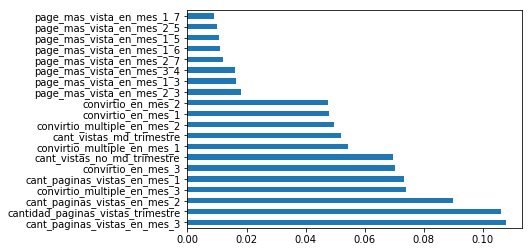

In [39]:
feat_importances = pd.Series(modelo.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

---

---

### Binary encoding

In [2]:
train=pd.read_pickle("../data/train_codificado.pkl")#,dtype=tipos_conv)

In [60]:
pred = pd.read_pickle("../data/prediccion_codificado.pkl")
pred.sort_index(inplace = True)

In [4]:
RANDOM_SEED = 12
TEST_SIZE_PERCENT = 0.2

In [5]:
y = train['convirtio']
X = train.drop(axis=1, labels=['convirtio'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

feature_list = list(X.columns)

In [6]:
modelo = xgb.XGBClassifier(learning_rate=0.05, n_estimators=130, max_depth=3,
 min_child_weight=5, gamma=0.3, subsample=0.7, colsample_bytree=0.6, reg_alpha =0.1,seed=RANDOM_SEED)

In [8]:
# Training
modelo.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.3,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=12,
              silent=None, subsample=0.7, verbosity=1)

In [9]:
# Predict value
pred_test = modelo.predict_proba(X_test)

In [10]:
y_test_predictd = pred_test[:, 1]
roc_auc_score(y_test, y_test_predictd)

0.8807752255947499

In [11]:
modelo.score(X_test, y_test)

0.9848701113331431

### Predecir competencia

In [61]:
prediccion = modelo.predict_proba(pred)

In [62]:
prediccion =  pd.DataFrame(prediccion)[1].to_frame()

In [63]:
submit = pd.read_csv("../data/sampleSubmission.csv", index_col = 0)

In [64]:
submit["pred"] = prediccion[1]

In [65]:
submit["SCORE"] = submit["pred"]

In [66]:
submit.drop("pred", axis = 1, inplace = True)

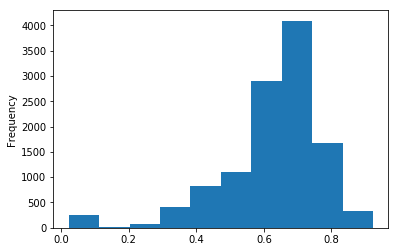

In [68]:
submit['SCORE'].plot(kind='hist')

In [69]:
submit.to_csv('../data/submit_random_forest_codificado.csv')

In [70]:
#modelo.save_model("modelo1_xgb_codificado")

In [71]:
# Get numerical feature importances
importances = list(modelo.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 7)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: cantidad_paginas_vistas_trimestre Importance: 0.1713081
Variable: cant_paginas_vistas_en_mes_3 Importance: 0.1557786
Variable: cant_paginas_vistas_en_mes_2 Importance: 0.1310222
Variable: cant_paginas_vistas_en_mes_1 Importance: 0.1236926
Variable: page_mas_vista_en_mes_2_3 Importance: 0.0613651
Variable: cant_vistas_md_trimestre Importance: 0.0584804
Variable: page_mas_vista_en_mes_3_4 Importance: 0.0502743
Variable: page_mas_vista_en_mes_1_3 Importance: 0.0469419
Variable: cant_vistas_no_md_trimestre Importance: 0.0452346
Variable: page_mas_vista_en_mes_2_7 Importance: 0.0325832
Variable: page_mas_vista_en_mes_1_5 Importance: 0.0240237
Variable: page_mas_vista_en_mes_1_6 Importance: 0.0135583
Variable: page_mas_vista_en_mes_3_7 Importance: 0.0101424
Variable: page_mas_vista_en_mes_3_5 Importance: 0.0087006
Variable: page_mas_vista_en_mes_1_7 Importance: 0.0074018
Variable: page_mas_vista_en_mes_3_6 Importance: 0.0066862
Variable: convirtio_multiple_en_mes_2 Importance: 0.00

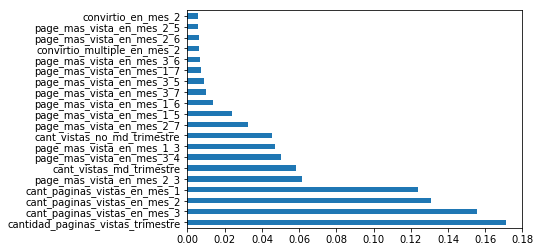

In [72]:
feat_importances = pd.Series(modelo.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')